This is the second round of testing.

zeus_proto_typing is the initial round of design and testing of some fundamental aspects.  For reviewing Conf Int programming and bootstrapping programming, as it was originally done, and, importantly, considered to be done, see that file.

Here, it is the aim to make the library a functioning and usable piece of software and implement any necessary polishing.

# Recap

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import pandas as pd

In [100]:
import cPickle

In [101]:
%matplotlib inline

In [102]:
pwd

u'/Users/errollloyd/Dropbox/Science/scripts'

In [103]:
cd /Users/errollloyd/Dropbox/Science/scripts

/Users/errollloyd/Dropbox/Science/scripts


In [124]:
import zeus
reload(zeus)

test = zeus.Zeus('/Users/errollloyd/Science/scripts/pyth/zeus/Zeus_proto_files/')
test._sort()

All files imported and assigned

Following files loaded successfully:

u17_r1_avg_waveshape.txt
u17_r1_spike.txt
u17_r1_stim_mark.txt

stimulus length has been calculated from the set of markers; taking the maximum distance between all adjacent pairs of markers


In [62]:
test._analyse(bin_width=0.01)
test._conditions(list = ['one', 'two', 3, '4', '5', '6', '7', '8', '9'])

AssertionError: not all the labels provided are strings

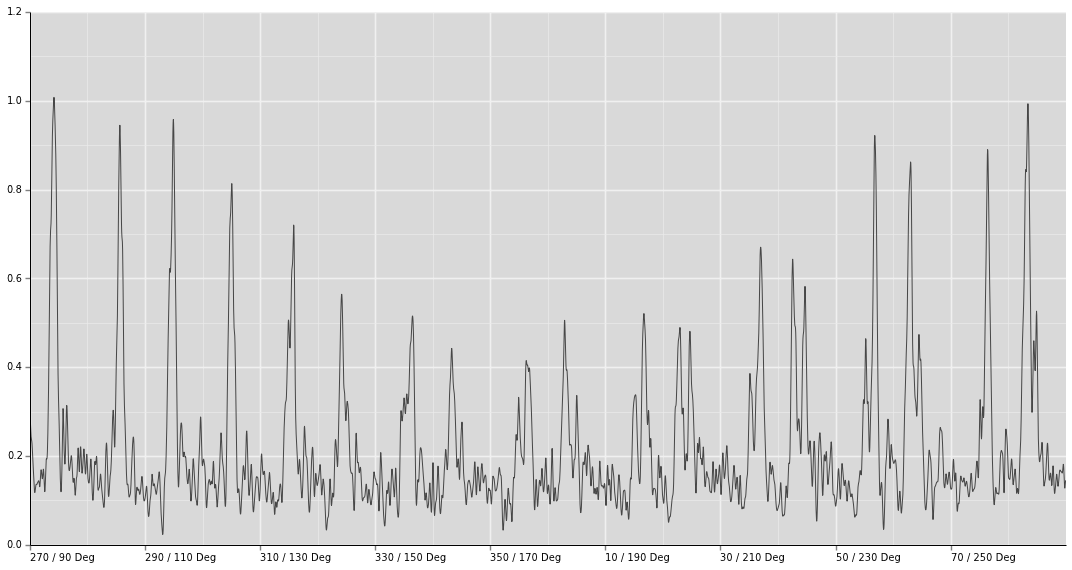

In [17]:
test._psth_flat(sigma=3)

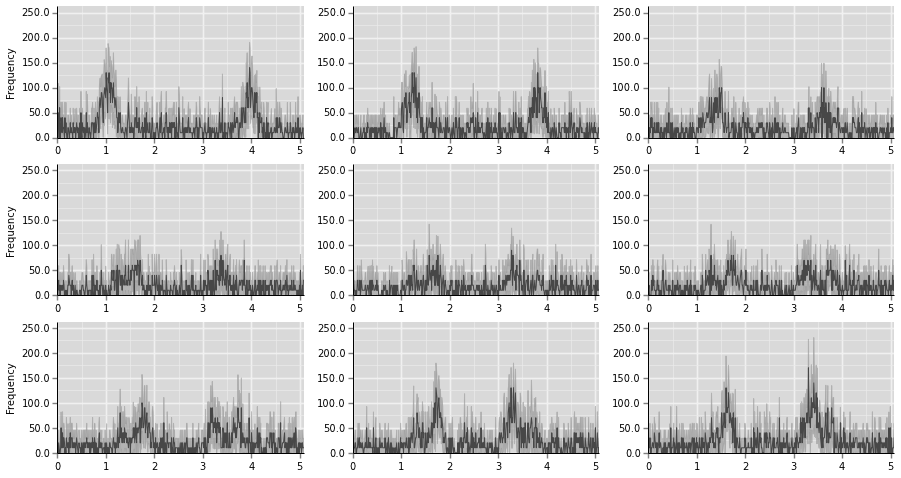

In [26]:
test.PSTH(density=False, plot_type='line')

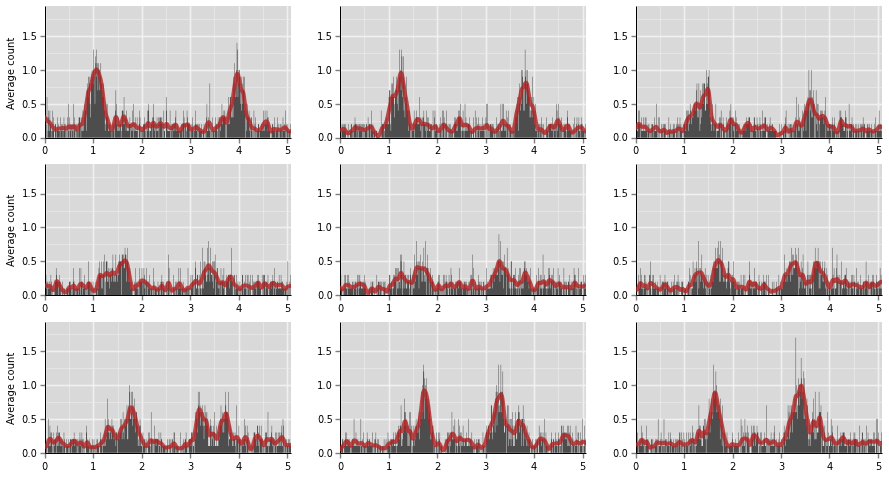

In [30]:
test.PSTH(plot_type='hist', density=True, frequency=False)

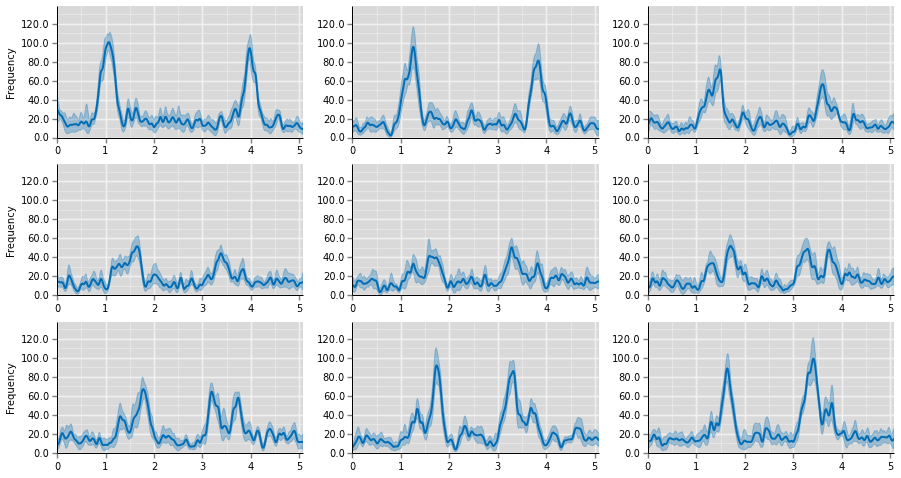

In [36]:
test.SDF()

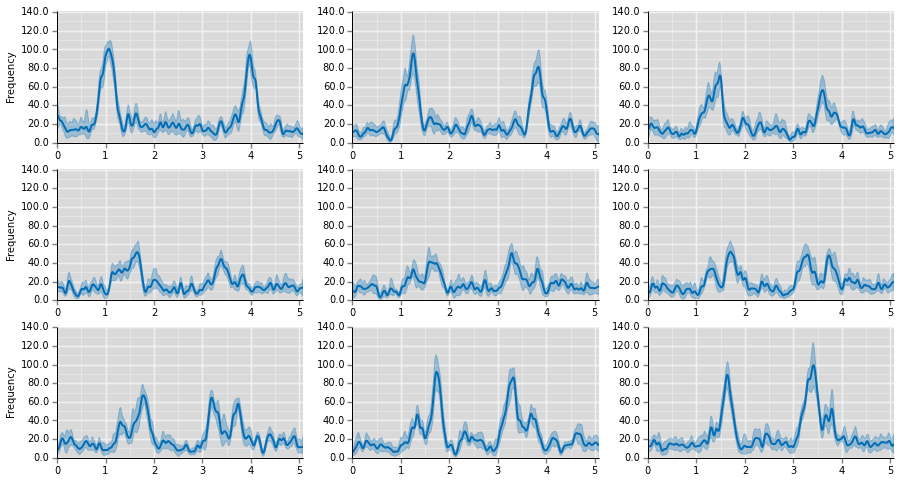

In [34]:
test.SDF(n_bootstrap=500)

# Marker Diagnosis

In [84]:
test.markers[-1] += 7.

In [85]:
marker_diff = np.r_[0.0, ( np.subtract( test.markers[1:], test.markers[:-1]))]

anomaly = np.greater(marker_diff, np.ones_like(marker_diff) * 1.2 * np.median(marker_diff))

table2 = pd.DataFrame({'markers': test.markers, 'difference':marker_diff, 'anomalous':anomaly})


In [98]:
table2['difference'].sum()

458.51623000000001

In [75]:
mrows = pd.get_option('max_rows')
pd.set_option('max_rows', test.markers.size)
table2

,anomalous,difference,markers
0,False,0.000000,26.763260
1,False,5.086695,31.849955
2,False,5.074200,36.924155
3,False,5.074195,41.998350
4,False,5.086700,47.085050
5,False,5.061700,52.146750
6,False,5.074200,57.220950
7,False,5.074200,62.295150
8,False,5.061700,67.356850
9,False,5.086700,72.443550


In [93]:
if 1000:
    print True
else:
    print False

True


In [97]:
table2[table2['anomalous'] == True]

,anomalous,difference,markers
89,True,12.086695,485.27949


In [91]:
type( table2[table2['anomalous'] == True].index.size)

int

In [65]:
table2.iloc[89]['anomalous']

True

In [94]:
def f_test():
    print 'this function works'

package = {'function':f_test, 'message':'hello'}

In [96]:
package['function']()

this function works


## Testing

In [120]:
test._marker_diag()

Stimulus parameters appear to be appropriate.  Running this function is unlikely to be necessary.  If anomalies are found, timing errors during the experimen are likely to be the culprit, and perhaps irretrivable.


{'bad_marks': Empty DataFrame
 Columns: [anomalous, difference, markers, multiple]
 Index: [],
 'bad_marks_index': Int64Index([], dtype='int64'),
 'num_mark_found': 0,
 'num_missing_mark': 0,
 'num_missing_mark_at_beginning': 0}

In [121]:
test.markers[-1] += 7.

In [123]:
test._marker_diag().keys()

Stimulus parameters appear to be appropriate.  Running this function is unlikely to be necessary.  If anomalies are found, timing errors during the experimen are likely to be the culprit, and perhaps irretrivable.


['bad_marks_index',
 'num_missing_mark_at_beginning',
 'num_missing_mark',
 'num_mark_found',
 'bad_marks']

In [131]:
test.markers = np.delete(test.markers, 0)

In [132]:
test._marker_diag()

{'bad_marks':    anomalous  difference     markers  multiple
 12      True   10.135900   97.802045         1
 24      True   10.148395  163.754130         1
 60      True   10.148395  351.462005         1
 67      True   10.160900  392.043100         1,
 'bad_marks_index': Int64Index([12, 24, 60, 67], dtype='int64'),
 'num_mark_found': 4.0,
 'num_missing_mark': 5,
 'num_missing_mark_at_beginning': 1.0}

# Condition Name Handling

Aim here is to provide condition names that are passed to PSTH labels and total condition tuning plots.

Trick with orientation is to parse the circularity of it well.

---

WIth basic orientation tuning, could pass beinning, end and interval and code the rest.

ALternative is to pass the conditions in order.

For other condition types, such as length or spatial frequency, there is no need for computation, simply the strings of the conditions, or the relevant numbers, will be sufficient.

An additional feature may be to provide the unit

In [87]:
## Orientation

def circ(ori):
    ori[ori<0] += 360
    ori[ori>360] -= 360
    ori[ori>720] -= 720
    return ori

beg = -90
intvl = 20

con_n = 9

end = beg+ intvl*con_n

con = circ(np.arange(beg, end, intvl))
con2 = circ(con + 180)



con = circ(con)
con2 = circ(con2)

print con, '\n', con2

[270 290 310 330 350  10  30  50  70] 
[ 90 110 130 150 170 190 210 230 250]


In [9]:
import zeus
reload(zeus)

test = zeus.Zeus('/Users/errollloyd/Science/scripts/pyth/zeus/Zeus_proto_files/')
test._sort()
test._analyse()

All files imported and assigned

Following files loaded successfully:

u17_r1_avg_waveshape.txt
u17_r1_spike.txt
u17_r1_stim_mark.txt

stimulus length has been calculated from the set of markers; taking the maximum distance between all adjacent pairs of markers


In [10]:
test._conditions()

In [16]:
%matplotlib
test._psth()

Using matplotlib backend: Qt4Agg


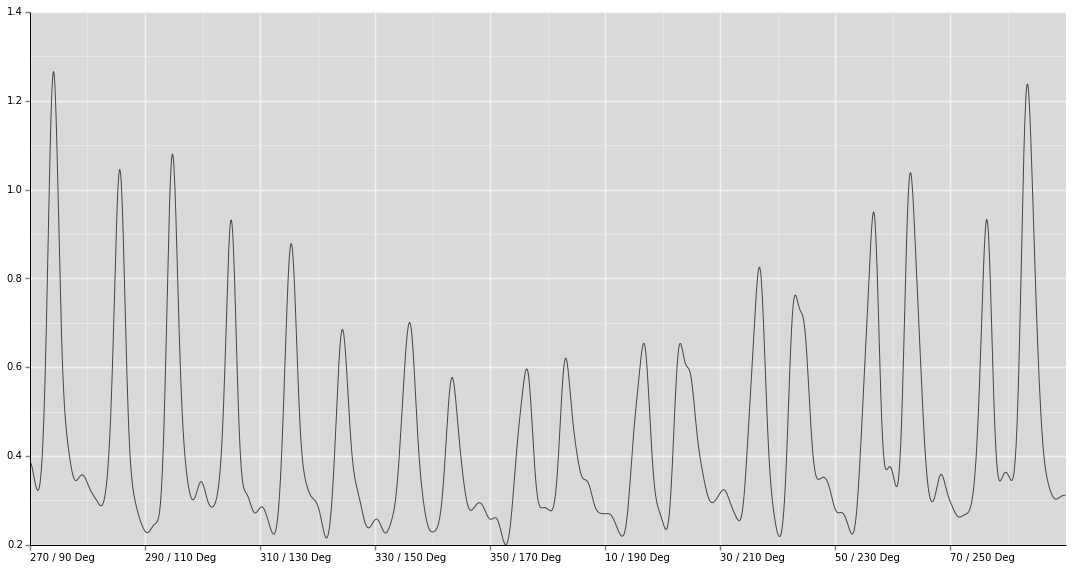

In [12]:
test._psth_flat(sigma=10)

In [17]:
%matplotlib
test._sdf(n_bootstrap=500, sigma=2)

Using matplotlib backend: Qt4Agg


In [71]:
test.parameters.keys()

['condition_unit',
 'trials',
 'bin_width',
 'condition_type',
 'directory',
 'conditions']

In [150]:
list_strings = ['1.00', '3.41', '5.6789', 'test']

try:
    a = np.array(list_strings).astype('f32')
except:
    print 'not all entries can be converted'

not all entries can be converted


# Tuning

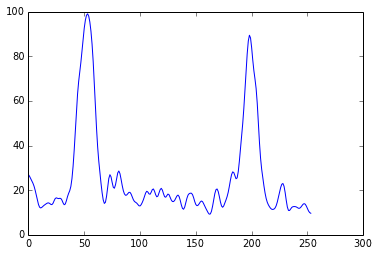

In [104]:
plt.plot(test.spike_dens_func[0] / test.parameters['bin_width'])

In [113]:
half = test.spike_dens_func.shape[1]/2
np.argmax(test.spike_dens_func[0, half:])


71

In [149]:
max_val_arg = (test.spike_dens_func[:, :half].argmax(axis=1),
                                   test.spike_dens_func[:, half:].argmax(axis=1)+half)

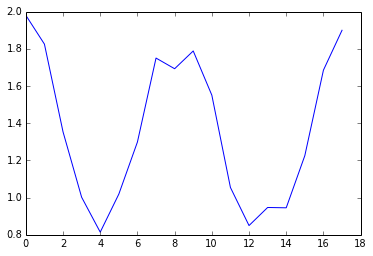

In [163]:
plt.plot(np.r_[test.spike_dens_func[np.arange(9),max_val_arg[0]], 
               test.spike_dens_func[np.arange(9),max_val_arg[1]]])

In [120]:
test.spike_dens_func[0, half+71] == test.spike_dens_func[0, half:].max()

True

In [129]:
max_val = test.spike_dens_func[:, :half].max(axis=1),test.spike_dens_func[:, half:].max(axis=1)

In [142]:
con_tuning = np.vstack((np.hstack((test.con, test.con2)), np.hstack(max_val)))
con_tuning

array([[ 270.        ,  290.        ,  310.        ,  330.        ,
         350.        ,   10.        ,   30.        ,   50.        ,
          70.        ,   90.        ,  110.        ,  130.        ,
         150.        ,  170.        ,  190.        ,  210.        ,
         230.        ,  250.        ],
       [   1.98029694,    1.82516554,    1.35360421,    1.00208671,
           0.81427969,    1.01874637,    1.29883544,    1.75020043,
           1.69284195,    1.7883965 ,    1.55086688,    1.05452032,
           0.84972767,    0.94686687,    0.94516589,    1.22567471,
           1.68511692,    1.89968105]])

In [145]:
con_tuning[:,np.argsort(con_tuning[0])]

array([[  10.        ,   30.        ,   50.        ,   70.        ,
          90.        ,  110.        ,  130.        ,  150.        ,
         170.        ,  190.        ,  210.        ,  230.        ,
         250.        ,  270.        ,  290.        ,  310.        ,
         330.        ,  350.        ],
       [   1.01874637,    1.29883544,    1.75020043,    1.69284195,
           1.7883965 ,    1.55086688,    1.05452032,    0.84972767,
           0.94686687,    0.94516589,    1.22567471,    1.68511692,
           1.89968105,    1.98029694,    1.82516554,    1.35360421,
           1.00208671,    0.81427969]])

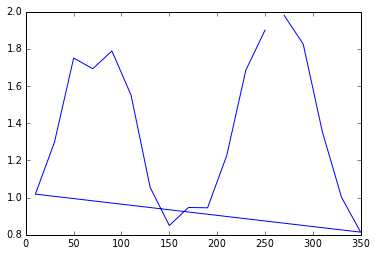

In [139]:
plt.plot(con_tuning[0], con_tuning[1])

(0, 2)

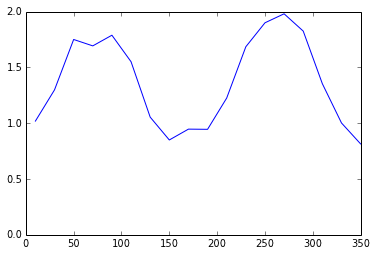

In [147]:
plt.plot(con_tuning[:,np.argsort(con_tuning[0])][0], con_tuning[:,np.argsort(con_tuning[0])][1])
plt.ylim((0, 2))

In [74]:
import zeus
reload(zeus)

test = zeus.Zeus('/Users/errollloyd/Science/scripts/pyth/zeus/Zeus_proto_files/')
test._sort()
test._analyse(bin_width=0.01)

All files imported and assigned

Following files loaded successfully:

u17_r1_avg_waveshape.txt
u17_r1_spike.txt
u17_r1_stim_mark.txt

stimulus length has been calculated from the set of markers; taking the maximum distance between all adjacent pairs of markers


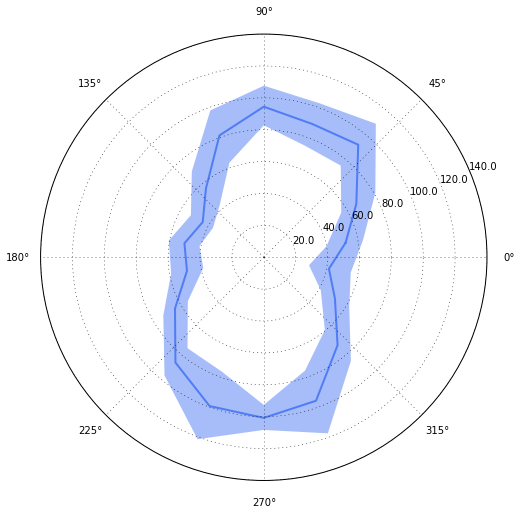

In [75]:
%matplotlib inline
test._sdf(n_bootstrap=500, plot=False)
test._conditions()
test._tuning(plot=True)

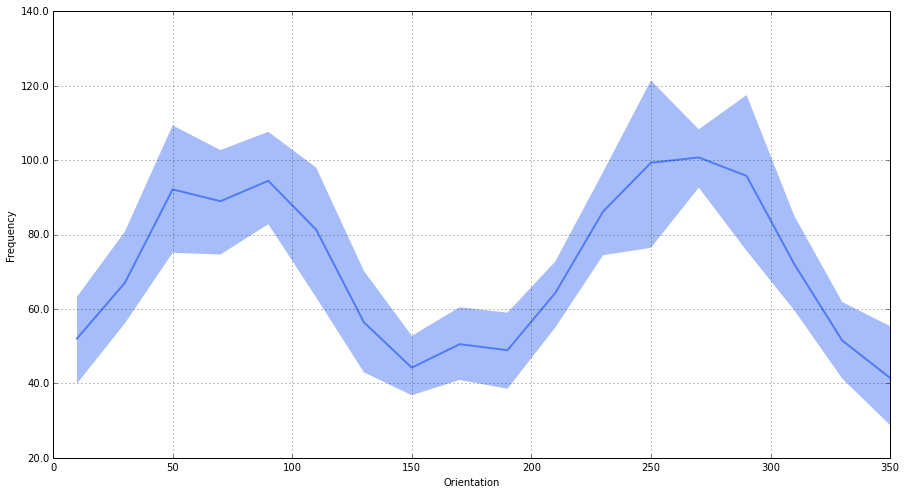

In [76]:
test._tuning(plot=True, plot_type='linear')

In [52]:
test.cond_tuning[0]

array([  10.,   30.,   50.,   70.,   90.,  110.,  130.,  150.,  170.,
        190.,  210.,  230.,  250.,  270.,  290.,  310.,  330.,  350.])

In [22]:
test.bin_width

0.01

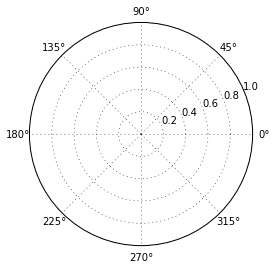

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

In [31]:
np.array(ax.get_yticks())

array([ 0.2,  0.4,  0.6,  0.8,  1. ])

In [29]:
np.round(ax.get_yticks() * (1/ test.bin_width), decimals=1)

TypeError: can't multiply sequence by non-int of type 'float'

In [34]:
np.set_printoptions(precision=8, suppress=True)
test.cond_tuning

array([[  10.        ,   30.        ,   50.        ,   70.        ,
          90.        ,  110.        ,  130.        ,  150.        ,
         170.        ,  190.        ,  210.        ,  230.        ,
         250.        ,  270.        ,  290.        ,  310.        ,
         330.        ,  350.        ],
       [   0.52062025,    0.67018367,    0.92153609,    0.88980455,
           0.94460938,    0.81326555,    0.56411479,    0.44220314,
           0.50543597,    0.48925949,    0.64306227,    0.86207557,
           0.99311595,    1.0074526 ,    0.95774856,    0.72000707,
           0.5152652 ,    0.41482186],
       [   0.39771226,    0.55555297,    0.75480757,    0.76205248,
           0.82040068,    0.63459926,    0.4284462 ,    0.36011461,
           0.41459999,    0.37831617,    0.55853062,    0.75119745,
           0.75995226,    0.93318043,    0.76032653,    0.59574453,
           0.4022073 ,    0.28060514],
       [   0.63326355,    0.79157223,    1.10416856,    1.03112026,

In [19]:
test.parameters['trials'], test.bin_width

(10, 0.01)

(0, 1.3)

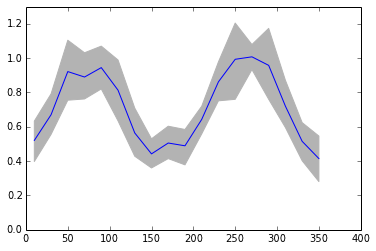

In [36]:
plt.plot(test.cond_tuning[0], test.cond_tuning[1])
plt.fill_between(test.cond_tuning[0], test.cond_tuning[2], test.cond_tuning[3], color='0.7')
plt.ylim((0, 1.3))

In [41]:
def wrap(array):
    return np.column_stack((array, array[...,0]))
wrap(test.con_tuning)

AttributeError: Zeus instance has no attribute 'con_tuning'

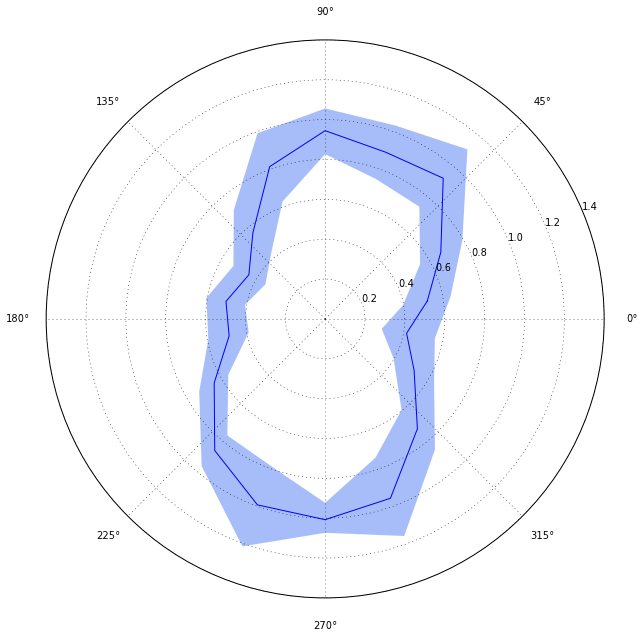

In [94]:
%matplotlib inline
plt.figure(figsize=(10, 10))
plt.polar(np.radians(wrap(test.cond_tuning)[0]), wrap(test.cond_tuning)[1])
plt.fill_between(np.radians(wrap(test.cond_tuning)[0]), wrap(test.cond_tuning)[2], wrap(test.cond_tuning)[3], 
                 color=[(80/255., 125/255., 245/255., 0.5)], edgecolor=[(80/255., 125/255., 245/255., 0.5)],
                 interpolate=True, lw=0)


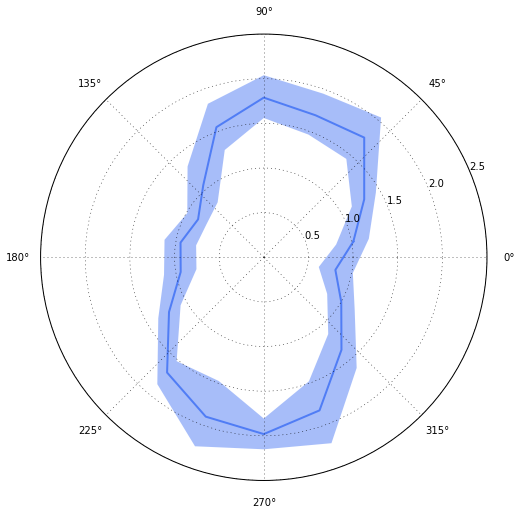

In [19]:
%matplotlib inline
test._tuning(plot=True)

## Spontaneous Rate

If no specific blank condition --- which will have to be handled --- then take spike rate from beginning of data before the first wave mark

In [83]:
test.spikes[test.spikes<test.markers[0]].size / test.markers[0]

15.132685629478623

'None'

# Saving Data

In [78]:
dir(test)

['CI_neg',
 'CI_pos',
 '__doc__',
 '__init__',
 '__module__',
 '_analyse',
 '_conditions',
 '_psth',
 '_psth_flat',
 '_sdf',
 '_sort',
 '_tuning',
 'bin_width',
 'bins',
 'con',
 'con2',
 'con_label',
 'con_tuning',
 'conditions_hist_mean',
 'conditions_hist_stderr',
 'conditions_trials',
 'conditions_trials_hist',
 'conditions_trials_zeroed',
 'data',
 'markers',
 'parameters',
 'shape',
 'spike_dens_func',
 'spikes']

In [70]:
dir(test)[8]

'bins'

In [79]:
with open('save_test.pik', 'wb') as f:
    cPickle.dump(test.__dict__, f)

In [80]:
pwd

u'/Users/errollloyd/Dropbox/Science/scripts'

In [81]:
save_test = cPickle.load(open('save_test.pik', 'rb'))

In [83]:
save_test['conditions_hist_mean'].mean() == test.conditions_hist_mean.mean()

True

In [90]:
test.__dict__.keys()

['con2',
 'spikes',
 'parameters',
 'conditions_trials',
 'conditions_trials_zeroed',
 'CI_pos',
 'markers',
 'conditions_trials_hist',
 'shape',
 'bin_width',
 'con_tuning',
 'CI_neg',
 'conditions_hist_mean',
 'spike_dens_func',
 'conditions_hist_stderr',
 'data',
 'con_label',
 'bins',
 'con']

Would like to generate an excel or CSV output also, I'm thinking using Pandas as an intermediary would be best

# Spontaneous Activity

Should part of the core analysis or sorting functions

In [23]:
assert??

Object `assert` not found.


In [30]:
tist = 1.32
tist

1.32

In [32]:
if tist:
    print 'yes'

yes


In [28]:
type(tist)

NoneType

In [49]:
print('hello this is words' 
      'and more wors')

hello this is wordsand more wors


In [51]:
def func(x):
    assert len(x) == 3, ('the length of x'
                         'is not long enough')

In [55]:
test = ['one', 'two', 'three', 'four']
all(isinstance(t, str) for t in test)

True

In [16]:
a = 2
b = 3

(2, 3, 2, 3, 2, 3, 2, 3)

In [24]:
test.con_tuning

array([[  10.        ,   30.        ,   50.        ,   70.        ,
          90.        ,  110.        ,  130.        ,  150.        ,
         170.        ,  190.        ,  210.        ,  230.        ,
         250.        ,  270.        ,  290.        ,  310.        ,
         330.        ,  350.        ],
       [   0.52062025,    0.67018367,    0.92153609,    0.88980455,
           0.94460938,    0.81326555,    0.56411479,    0.44220314,
           0.50543597,    0.48925949,    0.64306227,    0.86207557,
           0.99311595,    1.0074526 ,    0.95774856,    0.72000707,
           0.5152652 ,    0.41482186],
       [   0.3993133 ,    0.55860731,    0.75044627,    0.74616346,
           0.83555708,    0.63677169,    0.42687738,    0.35987895,
           0.42138647,    0.37642815,    0.55809851,    0.74268826,
           0.76430374,    0.9260068 ,    0.75837638,    0.60346925,
           0.39957935,    0.27608282],
       [   0.6207175 ,    0.77666263,    1.10859684,    1.02840624,

In [27]:
np.vstack((test.con_tuning[0,:], test.con_tuning[1:, :] * (1/0.01)))

array([[  10.        ,   30.        ,   50.        ,   70.        ,
          90.        ,  110.        ,  130.        ,  150.        ,
         170.        ,  190.        ,  210.        ,  230.        ,
         250.        ,  270.        ,  290.        ,  310.        ,
         330.        ,  350.        ],
       [  52.06202495,   67.01836693,   92.15360887,   88.98045476,
          94.46093763,   81.32655528,   56.41147935,   44.2203139 ,
          50.54359708,   48.92594949,   64.30622659,   86.20755679,
          99.31159538,  100.74525951,   95.77485614,   72.00070689,
          51.5265196 ,   41.48218611],
       [  39.93133014,   55.86073055,   75.04462686,   74.61634624,
          83.55570823,   63.6771688 ,   42.68773821,   35.98789453,
          42.13864653,   37.64281477,   55.80985116,   74.26882604,
          76.43037403,   92.60067998,   75.83763764,   60.34692475,
          39.95793461,   27.60828181],
       [  62.07174997,   77.66626308,  110.85968437,  102.84062419,

In [28]:
type(test.bin_width)

float

In [42]:
wrap(test.cond_tuning[0])

ValueError: all the input array dimensions except for the concatenation axis must match exactly

# Pandas Integration

In [40]:
data = pd.DataFrame(test.cond_tuning).T

In [42]:
data

,0,1,2,3
0,10,0.520620,0.391098,0.640361
1,30,0.670184,0.552682,0.790342
2,50,0.921536,0.748633,1.095938
3,70,0.889805,0.757044,1.020730
4,90,0.944609,0.821155,1.078401
5,110,0.813266,0.628758,0.979155
6,130,0.564115,0.442354,0.719005
7,150,0.442203,0.363268,0.531885
8,170,0.505436,0.408640,0.604998
9,190,0.489259,0.373079,0.578810


In [ ]:
test.

In [152]:
wrd = 'helloj'

assert wrd.lower() in ['hello', 'bye'], 'FUK'

AssertionError: FUK